# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [10]:
weather_response = requests.get('http://api.openweathermap.org/data/2.5/weather?q=husavik'+'&appid='+weather_api_key)
weather_response_json=weather_response.json()
weather_response_json

{'coord': {'lon': -17.3389, 'lat': 66.0449},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 276.15,
  'feels_like': 272.48,
  'temp_min': 276.15,
  'temp_max': 276.15,
  'pressure': 1035,
  'humidity': 81},
 'visibility': 10000,
 'wind': {'speed': 4.12, 'deg': 20},
 'clouds': {'all': 40},
 'dt': 1619445399,
 'sys': {'type': 1,
  'id': 83,
  'country': 'IS',
  'sunrise': 1619412292,
  'sunset': 1619472545},
 'timezone': 0,
 'id': 2629833,
 'name': 'Husavik',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [54]:
lat = []
lng = []
temp = []
humidity =[]
clouds = []
wind = []
max_temp = []
cities_ls = []

for i in range(len(cities)):
    url = 'http://api.openweathermap.org/data/2.5/weather?q='+cities[i]+'&appid='+weather_api_key
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    try:
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        temp.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        wind.append(weather_json['wind']['speed'])
        max_temp.append(weather_json['main']['temp_max'])
        cities_ls.append(weather_json['name'])
        print(f"Processing Record {i} of | {cities[i]}")
    except:
        print("City Data doesn't exist")
        
weather_dict = {
    "city": cities_ls,
    "lat": lat,
    "lng": lng,
    "temp": temp,
    "max_temp": max_temp,
    "humidity": humidity,
    "clouds": clouds,
    "wind":wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head() 

Processing Record 0 of | husavik
Processing Record 1 of | punta arenas
Processing Record 2 of | busselton
Processing Record 3 of | albany
Processing Record 4 of | nikolskoye
Processing Record 5 of | rikitea
Processing Record 6 of | carnarvon
Processing Record 7 of | saint-philippe
Processing Record 8 of | lask
Processing Record 9 of | katsuura
Processing Record 10 of | ribeira grande
Processing Record 11 of | belle fourche
Processing Record 12 of | gejiu
Processing Record 13 of | marsa matruh
Processing Record 14 of | ilulissat
Processing Record 15 of | ambon
Processing Record 16 of | vila velha
Processing Record 17 of | nouadhibou
Processing Record 18 of | pasighat
Processing Record 19 of | port lincoln
Processing Record 20 of | hilo
Processing Record 21 of | roma
Processing Record 22 of | ancud
Processing Record 23 of | ushuaia
Processing Record 24 of | hermanus
Processing Record 25 of | mar del plata
City Data doesn't exist
Processing Record 27 of | kruisfontein
Processing Record 28

Processing Record 236 of | san patricio
Processing Record 237 of | guozhen
Processing Record 238 of | mackay
Processing Record 239 of | malinyi
Processing Record 240 of | vila franca do campo
Processing Record 241 of | khatanga
Processing Record 242 of | kharan
Processing Record 243 of | klaksvik
Processing Record 244 of | novyy urengoy
Processing Record 245 of | berlevag
Processing Record 246 of | waslala
Processing Record 247 of | castro
Processing Record 248 of | batie
Processing Record 249 of | fort nelson
Processing Record 250 of | bethel
Processing Record 251 of | vila do maio
Processing Record 252 of | geraldton
Processing Record 253 of | diego de almagro
Processing Record 254 of | zaozerne
Processing Record 255 of | havelock
Processing Record 256 of | kalat
Processing Record 257 of | rurrenabaque
Processing Record 258 of | nago
Processing Record 259 of | vanavara
Processing Record 260 of | teguldet
Processing Record 261 of | olavarria
Processing Record 262 of | narsaq
Processin

Processing Record 469 of | puerto el triunfo
Processing Record 470 of | tommot
Processing Record 471 of | ca mau
Processing Record 472 of | chapais
Processing Record 473 of | maceio
City Data doesn't exist
Processing Record 475 of | daoukro
Processing Record 476 of | outjo
Processing Record 477 of | tatawin
Processing Record 478 of | saint george
Processing Record 479 of | venezuela
Processing Record 480 of | talipan
Processing Record 481 of | aranos
Processing Record 482 of | thinadhoo
Processing Record 483 of | ust-kut
Processing Record 484 of | rangpur
Processing Record 485 of | kupang
City Data doesn't exist
Processing Record 487 of | umm lajj
Processing Record 488 of | vao
Processing Record 489 of | santa ines
Processing Record 490 of | itoman
Processing Record 491 of | alihe
Processing Record 492 of | zacualpan
Processing Record 493 of | semporna
Processing Record 494 of | minbu
Processing Record 495 of | manavalakurichi
Processing Record 496 of | lorengau
Processing Record 497 o

,city,lat,lng,temp,max_temp,humidity,clouds,wind
0,Husavik,66.0449,-17.3389,277.15,277.15,65,0,4.63
1,Punta Arenas,-53.1500,-70.9167,281.04,281.15,93,90,1.03
2,Busselton,-33.6500,115.3333,287.59,287.59,82,100,1.13
3,Albany,42.6001,-73.9662,281.87,283.15,32,5,3.58
4,Nikolskoye,59.7035,30.7861,277.96,278.71,81,90,2.00


In [17]:
print(len(lat))
print(len(lng))
print(len(temp))
print(len(cities))

574
574
574
615


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
weather_data.to_csv("Output/city_data.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
#  Get the indices of cities that have humidity over 100%.
weather_humidityover100=weather_data.loc[weather_data['humidity'] >100,:]
weather_humidityover100

,city,lat,lng,temp,humidity,clouds,wind


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

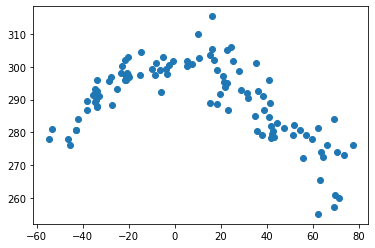

In [34]:
plt.scatter(weather_data['lat'],weather_data['temp'])

## Latitude vs. Humidity Plot

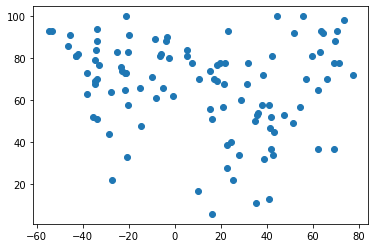

In [35]:
plt.scatter(weather_data['lat'],weather_data['humidity'])

## Latitude vs. Cloudiness Plot

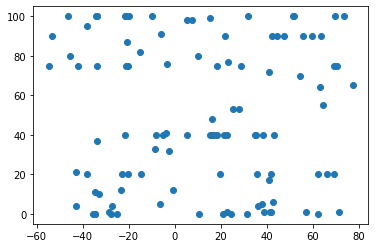

In [37]:
plt.scatter(weather_data['lat'],weather_data['clouds'])

## Latitude vs. Wind Speed Plot

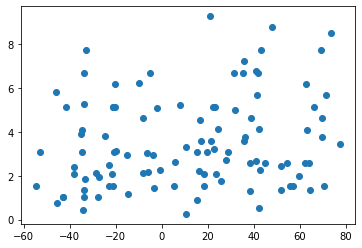

In [38]:
plt.scatter(weather_data['lat'],weather_data['wind'])

## Linear Regression

In [43]:
weather_data_nh = weather_data.loc[weather_data['lat']>=0,:]
weather_data_sh = weather_data.loc[weather_data['lat']<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'lat')

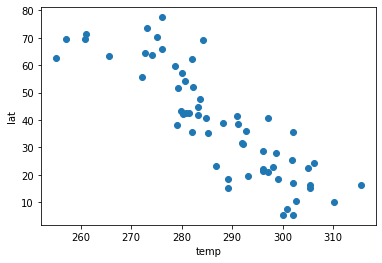

In [45]:
plt.scatter(weather_data_nh['max_temp'],weather_data_nh['lat'])
plt.xlabel('temp')
plt.ylabel('lat')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

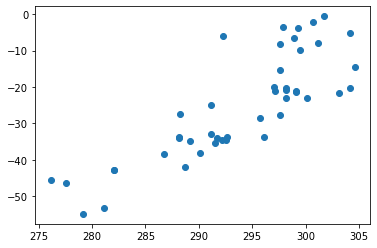

In [46]:
plt.scatter(weather_data_sh['max_temp'],weather_data_sh['lat'])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

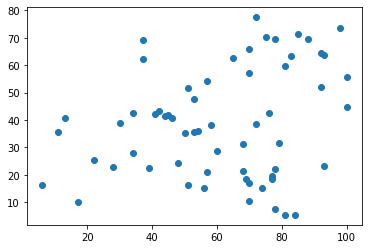

In [50]:
plt.scatter(weather_data_nh['humidity'],weather_data_nh['lat'])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

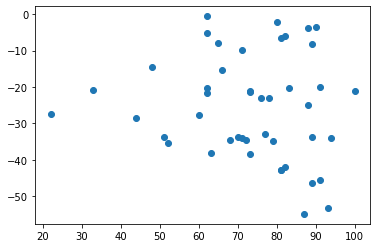

In [49]:
plt.scatter(weather_data_sh['humidity'],weather_data_sh['lat'])

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

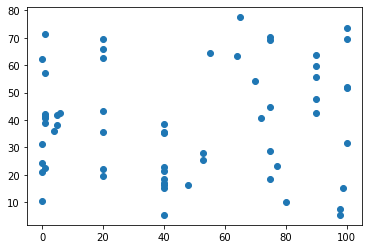

In [48]:
plt.scatter(weather_data_nh['clouds'],weather_data_nh['lat'])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

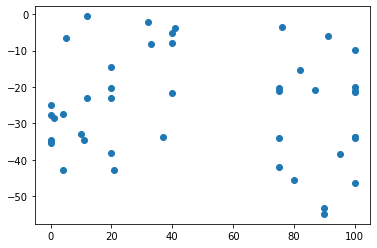

In [51]:
plt.scatter(weather_data_sh['clouds'],weather_data_sh['lat'])

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

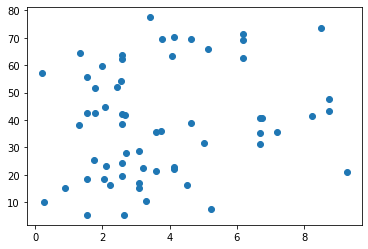

In [52]:
plt.scatter(weather_data_nh['wind'],weather_data_nh['lat'])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

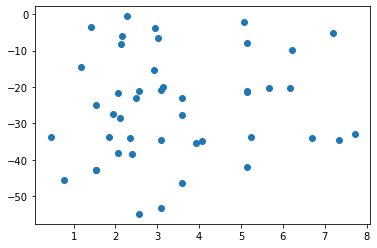

In [53]:
plt.scatter(weather_data_sh['wind'],weather_data_sh['lat'])